# CHAPTER 4: Linear Models

## Codes for various graphs and *in-text* coding questions

##### This notebook was made to act as a *statement of my understanding* during my journey just entering into the practical ML, while learning from the fabulous book by Aurélien Geron, Hands on Machine Learning with Scikit-Learn and TensorFlow, starting from the Chapter 2 of it. 

Since this was my first time doing ML, I definitely had a very pronounced learning curve throughout this notebook on how to plot the figures and training and all that stuff, which is quite visible too as you go down

Saving Figure generated_data_plot


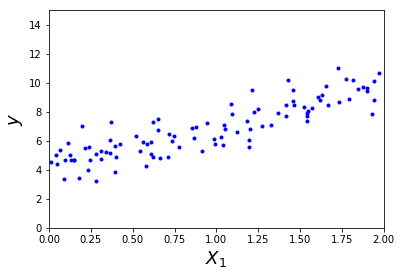

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


np.random.seed(42)


def save_fig(fig_id):
    path = "C:\\Users\\Animesh\\Desktop\\matplotlib\\" + fig_id + ".png"
    print("Saving Figure", fig_id)
    plt.savefig(path,format = "png", dpi = 300)

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel("$X_1$",fontsize = 18)
plt.ylabel("$y$",fontsize = 18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")





X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)



eta = 0.1
n_iterations = 1000
m = len(X_b)
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients



X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]




def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration >0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        plt.xlabel('$x_1$',fontsize = 10)
        plt.ylabel('$y$', rotation = 0, fontsize = 10)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta$ = {}".format(eta), fontsize = 16)

This is the first time i'm writing in Jupyter, used to do mostly in Enthought Canopy.

Above part is copied from canopy, was made by me tho....

The Part below shows the path followed by the batch gradient descent algorithm with different values of eta.

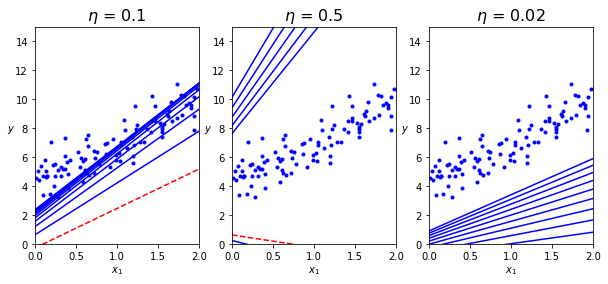

In [4]:
plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(np.random.randn(2,1),eta = 0.1)
plt.subplot(132); plot_gradient_descent(np.random.randn(2,1),eta = 0.5)
plt.subplot(133); plot_gradient_descent(np.random.randn(2,1),eta = 0.02)

# Stochastic Gradient Descent

Saving Figure sgd_plot


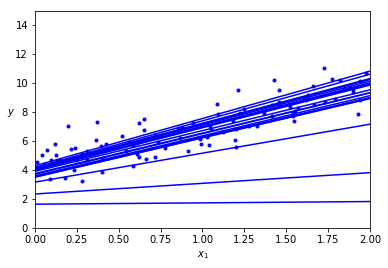

In [9]:
n_epochs = 50
theta_path_sgd = []
m = len(X_b)
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i<20:
            y_predict  = X_new_b.dot(theta)
            style = 'b-' if i>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize = 10)
plt.ylabel('$y$', rotation = 0, fontsize = 10)
plt.axis([0,2,0,15])
save_fig("sgd_plot")
plt.show()

The above one is Stochastic Gradient descent. As you can see, the whole algorithm visits the whole Dataset 'n_epoch' times, thus being extremely quick but not as precise as Batch Gradient Descent.

# Mini Batch Gradient Descent

In [11]:
theta_path_mbgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) #random theta to initialize with
t0,t1 = 200,1000
def learning_schedule(t):
    return t0/(t+t1)
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:minibatch_size+i]
        yi = y_shuffled[i:minibatch_size+i]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mbgd.append(theta)
        

In [12]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [14]:
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

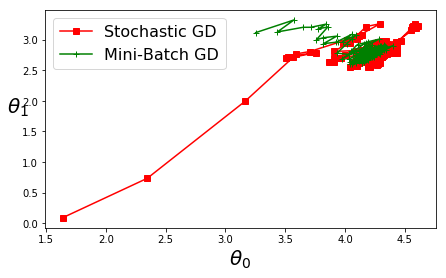

In [16]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',label = "Stochastic GD")
plt.plot(theta_path_mbgd[:,0],theta_path_mbgd[:,1],'g-+',label = "Mini-Batch GD")
plt.legend(loc = "upper left", fontsize = 16)
plt.xlabel(r"$\theta_0$",fontsize = 20)
plt.ylabel(r"$\theta_1$",fontsize = 20, rotation = 0)
plt.show()


Well The above figure shows the path of the two GD Algorithms, notice how erratic SGD is while how humble/less-erratic mini-batch GD actually is.

#Polynomial Regression

In [1]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)

In [13]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [14]:
def save_fig(fig_id):
    path = "C:\\Users\\Animesh\\Desktop\\matplotlib\\" + fig_id + ".png"
    print("Saving Figure", fig_id)
    plt.savefig(path,format = "png", dpi = 300)

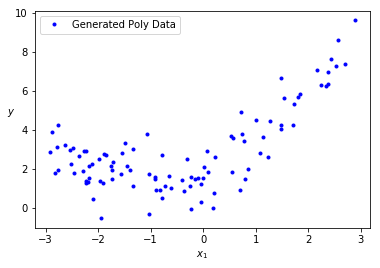

Saving Figure Poly Data


<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.plot(X,y,'b.',label = "Generated Poly Data")
plt.xlabel("$x_1$",fontsize = 10)
plt.ylabel("$y$", fontsize = 10, rotation = 0)
plt.legend()
plt.show()
save_fig("Poly Data")

Above graph is the generated data for Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.19590863])

In [20]:
X_poly[0]

array([-2.19590863,  4.82201471])

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_

array([1.82279725])

In [23]:
lin_reg.coef_

array([[0.99810185, 0.51370049]])

No handles with labels found to put in legend.


Saving Figure Predicted_Poly


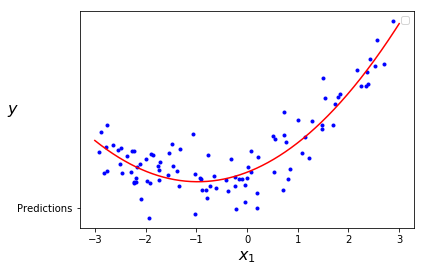

In [32]:
X_new = np.linspace(-3,3,1000).reshape(1000,1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',"Predictions")
plt.xlabel("$x_1$",fontsize = 16)
plt.ylabel("$y$",fontsize = 16, rotation = 0)
plt.legend()
save_fig("Predicted_Poly")
plt.show()

Above is a predicted model for a generated Polynomial Function using LinearRegression and Polynomial Features.

Saving Figure PolyReg for diff deg


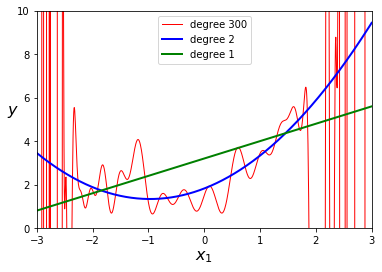

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
for style, width, degree in [('r-', 1, 300),('b-', 2, 2),('g-',2,1)]:
    polybig_features = PolynomialFeatures(degree = degree, include_bias=False)
    std_scaler = StandardScaler()
    poly_pipe = Pipeline([("poly_features",polybig_features),
                          ("std_scaler",std_scaler),
                          ("lin_reg",lin_reg)
                         ])
    poly_pipe.fit(X,y)
    y_new = poly_pipe.predict(X_new)
    plt.axis([-3,3,0,10])
    plt.plot(X_new,y_new,style,label = "degree " + str(degree),linewidth = width)
    
plt.legend()
plt.xlabel("$x_1$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
save_fig("PolyReg for diff deg")

Now as you can see, as the complexity of the model increases, so does the error due to variance of the model.
What we mean by that is the model with high complexity(higher degree) actually overfits the data as visible above. 

You can see that we used sklearn's Polynomial Features, to demonstrate it's capabilities (and what it does basically), look at the code below.

In [91]:
newdata = np.linspace(0,1,1000).reshape(1000,1) #This data has one attribute only, so output of Polyfeatures will be [1,a,a**2] where a is the instance
poly_features = PolynomialFeatures(degree = 3, include_bias=False) #Include Bias is nothing but the bias term in Linear Regression we all know and love/hate
newdata_feat = poly_features.fit_transform(newdata)                #Interaction Only include only the interacted term, not the one which will contain all the powers and higher degrees


In [92]:
newdata_feat

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00100100e-03, 1.00200300e-06, 1.00300601e-09],
       [2.00200200e-03, 4.00801202e-06, 8.02404808e-09],
       ...,
       [9.97997998e-01, 9.96000004e-01, 9.94006010e-01],
       [9.98998999e-01, 9.97999000e-01, 9.97000002e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

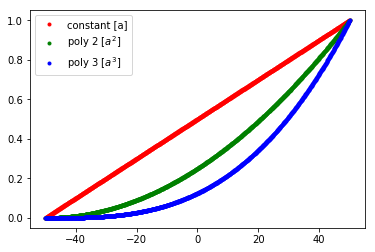

In [95]:
x = np.linspace(-50,50,1000)
plt.plot(x,newdata_feat[:,0],'r.',label = "constant [a]")
plt.plot(x,newdata_feat[:,1],'g.',label = 'poly 2 [$a^2$]')
plt.plot(x,newdata_feat[:,2],'b.',label = 'poly 3 [$a^3$]')

plt.legend()


So basically Polynomial features makes all combination of the data with the given degree as the input, and some other attributes too, to specify the output.

# Learning Curves

Graph of training error and validation error against size of training set

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    all_train_err, all_val_err = [],[]
    for j in range(1, len(X_train)):
        model.fit(X_train[:j],y_train[:j])
        y_train_pred = model.predict(X_train[:j])
        y_val_pred = model.predict(X_test)
        tr_err = mean_squared_error(y_train[:j],y_train_pred)
        val_err = mean_squared_error(y_test, y_val_pred)
        all_train_err.append(tr_err)
        all_val_err.append(val_err)
    plt.plot(np.sqrt(all_train_err),'r-',linewidth = 1,label = "TRAIN")
    plt.plot(np.sqrt(all_val_err), 'b-',linewidth = 2,label = "VALIDATION")
    plt.legend()
    plt.xlabel("$Training Set Size$", fontsize = 16)
    plt.ylabel("$RMSE$", fontsize = 16)
    plt.title("Learning Curve")
    plt.axis([0,80,0,2])
    

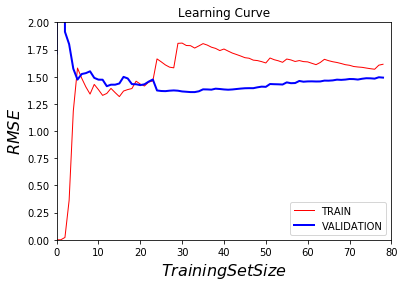

In [140]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg,X,y)

So what we did above is that we first split the data into training and valiation set, then we ran a loop to go through all the insatnces and as we go through all of them, we also fit the model with all the instances before it and we calculate error with the predictions from the training set scanned so far and validation error on all of the validation set.
Then we plotted it as above.

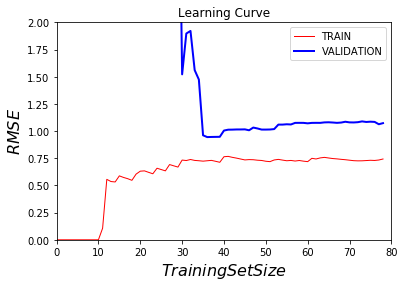

In [141]:
from sklearn.pipeline import Pipeline
X= 6*np.random.rand(100,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(100,1)
poly_reg = Pipeline([("poly_features",PolynomialFeatures(degree = 10,include_bias=False)),
                     ("lin_reg",LinearRegression()),
                    ])
plot_learning_curves(poly_reg,X,y)


#Regularized Models

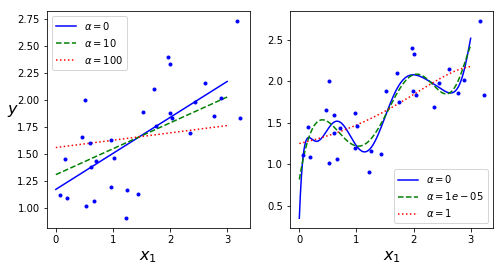

In [191]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 30
X = 3.33 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 2.5
#New data above

def plot_model(model_class,alphas,isPoly = False,**kwrds ):
    for alpha,style in zip(alphas,("b-", "g--", "r:")):
        model = model_class(alpha,**kwrds) if len(alphas)>0 else LinearRegression()
        if isPoly:
            model = Pipeline([("poly_feat",PolynomialFeatures(degree = 10,include_bias=False)),
                              ("std_scaler",StandardScaler()),
                              ("regula_reg",model)
                             ])
        model.fit(X,y)
        y_pred = model.predict(X_new)
        plt.plot(X_new, y_pred, style, label = r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,'b.')
    plt.legend(fontsize = 10)
    plt.xlabel("$x_1$",fontsize = 16)  
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(alphas = (0,10,100),isPoly=False,model_class=Ridge)
plt.ylabel("$y$",fontsize = 16,rotation = 0)
plt.subplot(122)
plot_model(alphas = (0,10**-5,1),isPoly = True, model_class= Ridge)
plt.show()
    

C:\Users\Animesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Animesh\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Animesh\Anaconda3\lib\site-packages\sklea

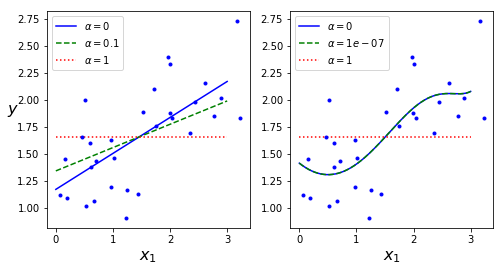

In [196]:
from sklearn.linear_model import Lasso
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(alphas = (0,0.1,1), isPoly=False, model_class=Lasso,random_state = 42)
plt.ylabel("$y$",fontsize = 16, rotation = 0)
plt.subplot(122)
plot_model(alphas = (0,10**-7,1), isPoly=True, model_class = Lasso, random_state = 42)


#Early Stopping

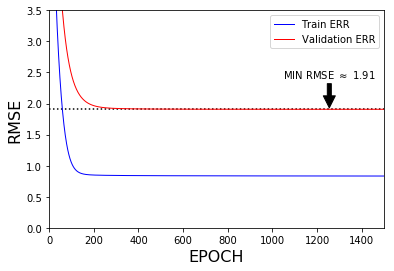

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Let's create some data
np.random.seed(42)
m  = 100
X = 3*np.random.rand(m,1)
y = 2*X**2 + X + 1.5 + np.random.randn(m,1)

#Let's split the data now

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y.ravel(),test_size = 0.5,random_state = 420) 

#Importing SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

#Pipeline for polynomial regression's data
polfeat_scaler = Pipeline([('pol_feat',PolynomialFeatures(degree = 90, include_bias= False))
                          ,('std_scaler',StandardScaler())])

X_train_pol_scal = polfeat_scaler.fit_transform(X_train)
X_val_pol_scal = polfeat_scaler.fit_transform(X_val)

#Implementing Batch Gradient Descent 
n_epochs = 1500
train_err,val_err = [],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_pol_scal,y_train)
    y_train_pred = sgd_reg.predict(X_train_pol_scal)
    y_val_pred = sgd_reg.predict(X_val_pol_scal)
    train_err.append(np.sqrt(mean_squared_error(y_pred=y_train_pred,y_true=y_train)))
    val_err.append(np.sqrt(mean_squared_error(y_pred=y_val_pred,y_true=y_val)))                 

best_epoch = np.argmin(val_err)
best_val_rmse = val_err[best_epoch]



plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],'k:')
plt.annotate(r"MIN RMSE $\approx$ {}".format(np.round(best_val_rmse,2)),xy = (best_epoch,best_val_rmse), xytext = (best_epoch, best_val_rmse + 0.5),ha = "center", arrowprops = dict(facecolor = 'black',shrink = 0.05))
plt.plot(train_err,'b-',linewidth = 1,label = "Train ERR")
plt.plot(val_err,'r-',linewidth = 1,label = "Validation ERR")
plt.axis([0,1500,0,3.5])
plt.legend(fontsize  =10)
plt.xlabel("EPOCH",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)
plt.show()
                   


In [4]:
best_epoch

1255

#Ridge, Lasso and the effects of regularization

In [62]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1*np.sign(theta) + 2*l2*theta
        theta = theta - eta*gradients
        path.append(theta)
    return (path)



Some problems have occured, will continue this part later....

#Logistic Regression

##Logit Function

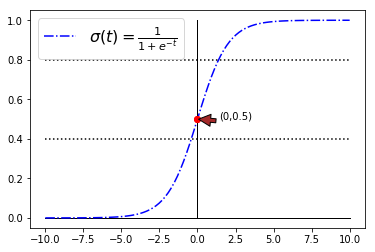

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#sigma(t) = 1/(1+exp(-t))   ----> LOGIT FUNCTION
t = np.linspace(-10,10,100)
logit = 1/(1+np.exp(-t))
plt.plot([-10,10],[0,0],'k',linewidth = 1)
plt.plot([0,0],[0,1],'k',linewidth = 1)
plt.plot(t,logit,'b-.',label = r'$\sigma (t) = \frac{1}{1 + e^{-t}}$')
plt.plot([-10,10],[0.4,0.4],'k:')
plt.plot([-10,10],[0.8,0.8],'k:')

plt.legend(fontsize = 16)
#plt.annotate(r"MIN RMSE $\approx$ {}".format(np.round(best_val_rmse,2)),xy = (best_epoch,best_val_rmse), xytext = (best_epoch, best_val_rmse + 0.5),ha = "center", arrowprops = dict(facecolor = 'black',shrink = 0.05))
plt.plot([0,0],[0.5,0.5],'ro')
plt.annotate(r"(0,0.5)", xy = (0,0.5), xytext = (2.5,0.5), ha = "center", arrowprops = dict(facecolor = "brown", shrink = 0.05))
plt.show()


## IRIS DATASET REGRESSION

In [9]:
from sklearn import datasets
iris = datasets.load_iris()


In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
import numpy as np
X = iris.data[:,3:]

In [13]:
y = (iris.target == 2).astype(np.int)

So now, X contains the petal width of all the samples and y contains whether the corresponding sample is *Iris-Virginica*

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = "liblinear", random_state = 42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
import numpy as np
X_new = np.linspace(0,3,100).reshape(100,1)
y_probab = log_reg.predict_proba(X_new) 


In [16]:
X_new

array([[0.        ],
       [0.03030303],
       [0.06060606],
       [0.09090909],
       [0.12121212],
       [0.15151515],
       [0.18181818],
       [0.21212121],
       [0.24242424],
       [0.27272727],
       [0.3030303 ],
       [0.33333333],
       [0.36363636],
       [0.39393939],
       [0.42424242],
       [0.45454545],
       [0.48484848],
       [0.51515152],
       [0.54545455],
       [0.57575758],
       [0.60606061],
       [0.63636364],
       [0.66666667],
       [0.6969697 ],
       [0.72727273],
       [0.75757576],
       [0.78787879],
       [0.81818182],
       [0.84848485],
       [0.87878788],
       [0.90909091],
       [0.93939394],
       [0.96969697],
       [1.        ],
       [1.03030303],
       [1.06060606],
       [1.09090909],
       [1.12121212],
       [1.15151515],
       [1.18181818],
       [1.21212121],
       [1.24242424],
       [1.27272727],
       [1.3030303 ],
       [1.33333333],
       [1.36363636],
       [1.39393939],
       [1.424

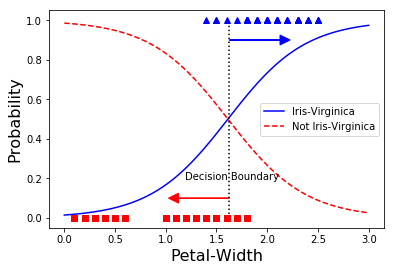

In [43]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_probab[:,1],'b-',label = "Iris-Virginica")
plt.plot(X_new,y_probab[:,0],'r--',label = "Not Iris-Virginica")

dec_bound = X_new[y_probab[:,1] >= 0.5][0]
plt.plot([dec_bound-0.01,dec_bound-0.01],[0,1],'k:')      #0.0.1 subtracted just to compensate
plt.text(s = "Decision Boundary",x = dec_bound-0.45,y = 0.195,fontsize = 10)
plt.plot(X[y==0],y[y==0],'rs')
plt.plot(X[y==1],y[y==1],'b^')
plt.arrow(dx=-0.5,dy=0,x=dec_bound-0.01,y=0.1, head_width=0.05, head_length=0.1, fc='r', ec= 'r')
plt.arrow(dx=0.5,dy=0,x=dec_bound-0.01,y=0.9, head_width = 0.05,head_length = 0.1, fc = 'b', ec = 'b')
plt.xlabel("Petal-Width",fontsize = 16)
plt.ylabel("Probability", fontsize = 16)

plt.legend(fontsize = 10)
plt.show()

Petal length vs Petal width

In [211]:
X = iris.data[:,(2,3)]       #Petal length and petal width
y = iris.target
y = (y == 2).astype(np.int)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear',C=10**11,random_state=42)
log_reg.fit(X,y)
x0, x1 = np.meshgrid(np.linspace(2.1,7.0,500).reshape(-1,1), np.linspace(0.8,2.7,200).reshape(-1,1))

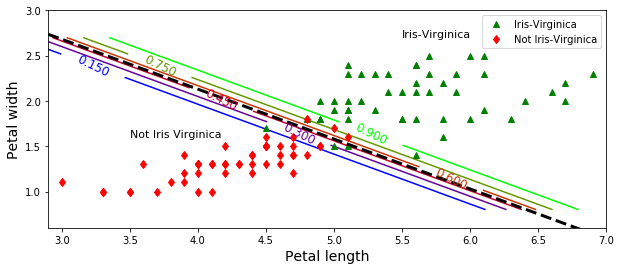

In [212]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_prob = log_reg.predict_proba(X=X_new)
plt.figure(figsize = (10,4))
plt.plot(X[y==1,0],X[y==1,1], 'g^', label = "Iris-Virginica")   #Iris - Virginica plotted
plt.plot(X[y==0,0],X[y==0,1], 'rd', label = "Not Iris-Virginica")    #Others plotted

z = y_prob[:,1].reshape(200,500)
contour = plt.contour(x0,x1,z,cmap = plt.cm.brg)
plt.clabel(contour, inline = 1, fontsize = 12)
x_range = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0]*x_range + log_reg.intercept_[0])/log_reg.coef_[0][1]
plt.plot(x_range,boundary,'k--',linewidth = 3)
plt.axis([2.9,7,0.6,3])
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.text(s="Not Iris Virginica",x=3.5,y=1.6,fontsize=11)
plt.text(s="Iris-Virginica",x=5.5,y=2.7,fontsize=11)
plt.legend()

For making the boundary, remember, that we have an equation like: $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$

#Softmax Regression on Iris-dataset

In [111]:
X= iris.data[:,(2,3)]       #Petal length and petal width
y = iris.target

softmax = LogisticRegression(multi_class="multinomial", solver = "lbfgs", C=10, random_state=42)
softmax.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

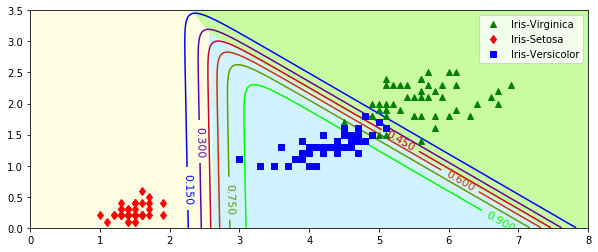

In [143]:
x0, x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_prob = softmax.predict_proba(X=X_new)

y_pred = softmax.predict(X= X_new)
from matplotlib.colors import ListedColormap
cmap1= ListedColormap(['#fffee3','#d1f3ff','#c9fca2'])


z = y_prob[:,1].reshape(200,500)
zz = y_pred.reshape(200,500)

plt.figure(figsize = (10,4))
plt.contourf(x0,x1,zz,cmap = cmap1)
contour = plt.contour(x0,x1,z,cmap = plt.cm.brg)
plt.clabel(contour, inline = True, fontsize = 11)
plt.plot(X[y==2,0],X[y==2,1], 'g^', label = "Iris-Virginica")   #Iris - Virginica plotted
plt.plot(X[y==0,0],X[y==0,1], 'rd', label = "Iris-Setosa")      #Iris- Setosa plotted
plt.plot(X[y==1,0],X[y==1,1], 'bs', label = "Iris-Versicolor")  #Iris- Versicolor plotted
plt.legend()




Notice that the boundaries between the classes is LINEAR...

#My solution for question no. 12 of chapter 4

Alright, so let's first load the iris database

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,(2,3)]   #Petal Length and Width
y = iris.target
import numpy as np

Adding the bias term to $X$

In [9]:
biased_X = np.c_[np.ones((len(X),1)),X]

Now we need to split the data into train and validation sets for early stopping, without sklearn....

In [17]:
train_size = 0.8
test_size = 1 - train_size
length_of_train_set = int(np.floor(train_size*len(X)))
length_of_test_set = int(np.floor(test_size*len(y)))
np.random.seed(42)
mixed_indices = np.random.permutation(len(y))
X_per = biased_X[mixed_indices]
y_per = y[mixed_indices]

X_train = X_per[:length_of_train_set:,:]
X_val = X_per[length_of_train_set::,:]
y_train = y_per[:length_of_train_set:]
y_val = y_per[length_of_train_set::]


We'll make a different test set later on.

Now, we need to use softmax regression formulas here on the dataset.

Now to use cross entropy cost function, we would need probabilities of each
instance being to a praticular class, for that, we would first convert this to
one-hot vectors, thus, a one-hot matrix.

In [215]:
def to_1_hot(y):
    size = (len(y),y.max()+1)
    y_1_hot = np.zeros(shape = size, dtype=np.int8)
    #for i in range(len(y)):
        #resp = y[i]                            #My version (the commented one) is 5 times slow!!!, This goes to show the power                                     
        #y_1_hot[i,resp] = 1                    #of numpy's underlying C implementation.
    y_1_hot[np.arange(len(y)),y] = 1
    return y_1_hot

In [19]:
%timeit to_1_hot(y_per)

9.23 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
y_train_1_hot = to_1_hot(y_train)
y_val_1_hot = to_1_hot(y_val)

Now let's implement the softmax algorithm.

First, let's implement the softmax function 


$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$


$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

In [21]:
def softmax_function(logits):
    exponents = np.exp(logits)
    exp_sums = np.sum(exponents, axis = 1, keepdims = True)      #For correct division
    return exponents/exp_sums

Now we will make the parameter matrix $\mathbf{\Theta}$ and train the model

In [44]:
shape = (X_train.shape[1],len(np.unique(y)))
Theta = np.random.randn(shape[0],shape[1])
epsilon = 10**-17       #TO avoid error during logarithm of '0'
n_iterations = 10000
eta = 0.1
m = len(X_train)
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax_function(logits)
    cost = -np.mean(np.sum(y_train_1_hot*np.log(y_proba + epsilon),axis=1))
    diff = (y_proba - y_train_1_hot)
    gradients = (1/m)*(X_train.T.dot(diff))
    Theta = Theta - eta*gradients
    if iteration%500 == 0:
        print(iteration, cost)
    

0 1.468907784625071
500 0.3485821408481299
1000 0.28209089161367074
1500 0.24654256736863925
2000 0.22320135787144116
2500 0.20629901711300258
3000 0.19332569460820553
3500 0.18296904421553067
4000 0.17446043078878323
4500 0.16731381565847148
5000 0.16120435299148445
5500 0.1559055699356026
6000 0.15125419653300476
6500 0.14712925320458525
7000 0.14343901000328127
7500 0.14011253405116877
8000 0.13709403177907795
8500 0.13433895707083604
9000 0.13181127034358614
9500 0.12948146804099467


In [52]:
Theta

array([[ 10.54189218,   1.7706717 , -12.60066057],
       [ -2.71838868,  -0.15781207,   0.91343042],
       [ -4.21693097,  -1.18231722,   4.31139392]])

Let's see what's the Accuracy of the model, yet.

In [66]:
logits = X_val.dot(Theta)
probs = softmax_function(logits)
predictions = np.argmax(probs,axis=1)
equals_or_not = predictions == y_val
equals_or_not = equals_or_not.astype(np.int)
accuracy_score = np.sum(equals_or_not)/(len)(equals_or_not) 

In [67]:
accuracy_score

0.9666666666666667

Next Task in the exercise is to add an $l_2$ Regularization on the cost function.

In [128]:
shape = (X_train.shape[1],len(np.unique(y)))
Theta = np.random.randn(shape[0],shape[1])
epsilon = 10**-17       #TO avoid error during evaluating logarithm of '0'
n_iterations = 7000
eta = 0.1
m = len(X_train)
alpha = 0.1

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax_function(logits)
    cost = -np.mean(np.sum(y_train_1_hot*np.log(y_proba + epsilon),axis=1))
    l2_cost = (1/2)*np.sum(np.square(Theta[1:]))                  #Starting from the 2nd row because the 1st row is the bias term
    total_cost = cost + alpha*l2_cost
    diff = (y_proba - y_train_1_hot)
    gradients = (1/m) * (X_train.T.dot(diff)) + np.r_[np.ones([1,len(np.unique(y))]), alpha*Theta[1:]]   #Note that what we are doing here for the l2 term of gradient part is nothing but the differential of 0.5*x**2, which is just x, with addition of the bias term.
    
    Theta = Theta - eta * gradients
    if iteration % 500 == 0:
        print(iteration, total_cost)
    

0 5.036218021475811
500 0.533866257199688
1000 0.5052759949379838
1500 0.49730097099628817
2000 0.4943774030150837
2500 0.4932052337410181
3000 0.4927139180734724
3500 0.4925026882602491
4000 0.4924104609648262
4500 0.4923697984887725
5000 0.4923517578051563
5500 0.492343720851996
6000 0.4923401307895453
6500 0.49233852425826563


In [129]:
Theta

array([[-6.95578912e+02, -6.99500048e+02, -7.04631417e+02],
       [-1.09932314e+00,  1.45192366e-01,  9.54130775e-01],
       [-4.44151956e-01, -1.42733501e-01,  5.86885457e-01]])

Let's check the accuracy score again. 
Notice how the cost is still greater than the one without the $l_2$ regularization

In [131]:
logits = X_val.dot(Theta)
probabs = softmax_function(logits)
predictions = np.argmax(probabs, axis = 1)
bools = predictions == y_val
bools.astype(np.int)
accuracy_score = np.sum(bools)/len(bools)

In [132]:
accuracy_score

0.9666666666666667

WELL...That deserves a sadface. The accuracy didn't improve, probably due to less training data. But still, we have implemented 
regularization on our model, and learned a lot in the process.

Now we just need to implement $\textit{Early Stopping}$

In [192]:
#Copying most of the initial code from above part
np.random.seed(42)
shape = (X_train.shape[1],len(np.unique(y)))
Theta = np.random.randn(shape[0],shape[1])
Theta_tr = Theta
Theta_val = Theta
epsilon = 10**-17       #TO avoid error during evaluating logarithm of '0'
n_iterations = 10000
eta = 0.1
m = len(X_train)
alpha = 0.1
min_cost = np.inf
counter = 0
min_iter = np.inf
min_arr = []

for iteration in range(n_iterations):
    logits = X_train.dot(Theta_tr)
    y_proba = softmax_function(logits)
    cost = -np.mean(np.sum(y_train_1_hot*np.log(y_proba + epsilon),axis=1))
    l2_cost = (1/2)*np.sum(np.square(Theta_tr[1:]))          #Starting from the 2nd row because the 1st row is the bias term
    total_cost = cost + alpha*l2_cost
    diff = (y_proba - y_train_1_hot)
    gradients = (1/m) * (X_train.T.dot(diff)) + np.r_[np.ones([1,len(np.unique(y))]), alpha*Theta_tr[1:]]  # what we are doing here for the l2 term of gradient part is nothing but the differential of 0.5*x**2, which is just x, with addition of the bias term.
    Theta_tr = Theta_tr - eta*gradients
    
    
    
    #Below part will be for calculating error on validation set, to check when to stop
    logits = X_val.dot(Theta_tr)
    y_probs = softmax_function(logits)
    entropy_cost = -np.mean(np.sum(y_val_1_hot * np.log(y_probs), axis = 1))
    l2_cost = 0.5*np.sum(np.square(Theta_tr[1:]))
    total_cost = entropy_cost + alpha * l2_cost
    if iteration%500 == 0:
        print(iteration, total_cost)
    
    
    #IMPLEMENTING EARLY STOPPING IN A MUCH EFFICIENT AND FAR SIGHTED WAY
    
    # Now we will look for next 10 iterations after reaching first minima, if total_cost still decreases lower than min_cost,
    # we'll let it run, otherwise, we'll break the loop.
    
    
    if total_cost < min_cost:
        min_cost = total_cost
        min_iter = iteration
        counter = 0
    
    else: 
        counter+=1  
        if counter == 10:
            print("reached limit to look further, breaking now...")
            print("Minimum arguments:--->")
            print("Iteration Number: " + str(min_iter))
            print("Minimum Cost: " + str(min_cost))
            break
        else:
            print(iteration, total_cost)   
        
            
        
    
    
    

0 6.934822871646868
500 0.5768492019254287
1000 0.5455107280634436
1500 0.5341469011942298
2000 0.5290613377676008
2500 0.5265391551932619
3000 0.5251909048138697
3500 0.5244266007199804
4000 0.5239730095884432
4500 0.5236942509580745
5000 0.5235184470744956
5500 0.5234054821881539
6000 0.523331929610945
6500 0.5232835961940112
7000 0.5232516333120898
7313 0.5232373772259674
7317 0.5232372089862564
7318 0.5232372369112824
7321 0.5232370086278291
7322 0.5232370148376573
7325 0.5232368237932541
7326 0.5232369148952587
7331 0.5232365945159224
7332 0.5232367097396301
7334 0.5232364581059681
7335 0.5232367255230279
7338 0.5232363743091722
7340 0.523236799093658
7341 0.523236813850498
7342 0.5232371515128822
7346 0.5232358280925821
7347 0.523235459369281
7348 0.5232363880802189
7351 0.523235592563634
7352 0.5232359498882904
7353 0.5232363728394608
7354 0.5232364328147556
7355 0.5232368391007524
7356 0.523236535338302
7358 0.5232342186994805
7360 0.5232382944820182
7361 0.5232399801782993
736

#####Please Note that the Theta to predict is now 'Theta_tr', don't use 'Theta' as it is.

In [196]:
logits = X_val.dot(Theta_tr)
y_probs = softmax_function(logits)
y_preds = np.argmax(y_probs, axis =1)

In [197]:
y_preds

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 2], dtype=int64)

SO......This was early stopping, which actually checks for the next 10 iterations after reaching a suspected local minima, if it sees a further dip in $\textit{total_cost}$, it resets the counter.

So, the above code actually implements $\textit{Softmax Regression}$ with $\textit{Early Stopping}$ with $\textit{Batch Gradient Descent}$ as the optimization Algorithm.

Finally, Let's plot the model's predictions.

Text(0,0.5,'Petal Width')

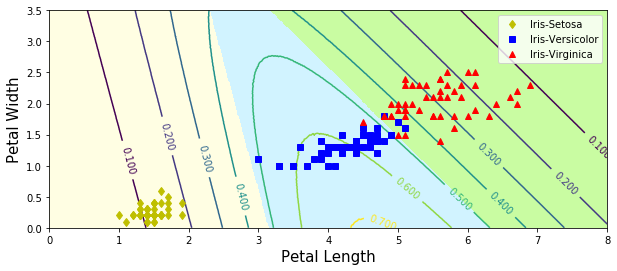

In [210]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(),x1.ravel()]
biased_X_new = np.c_[np.ones((len(X_new),1)), X_new]

logits = biased_X_new.dot(Theta_tr)
probs = softmax_function(logits)
predictions = np.argmax(probs,axis = 1)

z = probs[:,1].reshape(x1.shape)
zz = predictions.reshape(x1.shape)

plt.figure(figsize = (10,4))
plt.plot(X[y==0,0],X[y==0,1],'yd',label = "Iris-Setosa")
plt.plot(X[y==1,0],X[y==1,1],'bs',label = "Iris-Versicolor")
plt.plot(X[y==2,0],X[y==2,1],'r^',label = "Iris-Virginica")

from matplotlib.colors import ListedColormap
cmap1= ListedColormap(['#fffee3','#d1f3ff','#c9fca2'])


contour = plt.contour(x0,x1,z)
plt.clabel(contour, inline = True, cmap = plt.cm.brg)
plt.contourf(x0,x1,zz, cmap = cmap1)
plt.legend()
plt.xlabel("Petal Length", fontsize = 15)
plt.ylabel("Petal Width", fontsize = 15)


The Contour lines show probability of instance being to class 1, i.e. $\textit{Iris-Versicolor}$

So this was chapter 4 of the book, even though for some parts, I $\textit{desperately}$ needed to look at the codes, but that tendency reduced after
every line of code that I wrote myself.

Even though I had not perfected the Linear Models, from a theory standpoint, but still this served as a good building block from application and implementation standpoint (especially, completing the last question was most useful, even though, as I said, I had to look to the solution code initially a lot of times, but I still managed to do it myself, as much as I can, especially the main topics, like early stopping and BGD, I implemented all of them myself except some minor help here and there).

So yeah, I hope i look at the solution code more less and less through the upcoming chapters!!

Can't wait to get to Neural Networks!!!!